# eda
reproducing some paper and testing on some datasets

ETTm1 head:
                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 00:15:00  5.760  2.076  1.492  0.426  4.264  1.401  30.459999
2 2016-07-01 00:30:00  5.760  1.942  1.492  0.391  4.234  1.310  30.038000
3 2016-07-01 00:45:00  5.760  1.942  1.492  0.426  4.234  1.310  27.013000
4 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
ETTm1 shape: (69680, 8)
--------------------------------------------------
ETTh1 head:
                  date   HUFL   HULL   MUFL   MULL   LUFL   LULL         OT
0 2016-07-01 00:00:00  5.827  2.009  1.599  0.462  4.203  1.340  30.531000
1 2016-07-01 01:00:00  5.693  2.076  1.492  0.426  4.142  1.371  27.787001
2 2016-07-01 02:00:00  5.157  1.741  1.279  0.355  3.777  1.218  27.787001
3 2016-07-01 03:00:00  5.090  1.942  1.279  0.391  3.807  1.279  25.044001
4 2016-07-01 04:00:00  5.358  1.942  1.492  0.462  3.868  1.279  21.948000

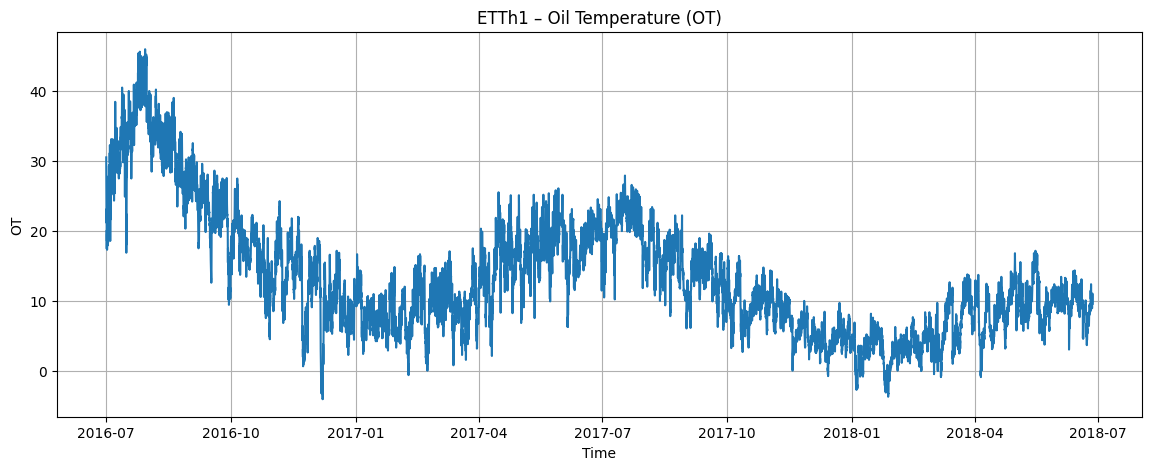

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

"""
ETT Dataset (ETTh1 / ETTm1)
---------------------------
Electricity Transformer Temperature dataset with power load & oil temperature.
- ETTh1: hourly data (2016–2018), ~17k rows × 8 cols
- ETTm1: 15-minute data, ~69k rows × 8 cols
Key signal: OT (oil temperature), shows strong seasonality and trend.
"""

# Load datasets
etth1 = pd.read_csv("data/energy/ETTh1/ETTh1.csv", parse_dates=["date"])
ettm1 = pd.read_csv("data/energy/ETTh1/ETTm1.csv", parse_dates=["date"])

print("ETTm1 head:\n", ettm1.head())
print("ETTm1 shape:", ettm1.shape)
print("-----" * 10)

print("ETTh1 head:\n", etth1.head())
print("ETTh1 shape:", etth1.shape)

# Plot OT (oil temperature) for hourly ETTh1
plt.figure(figsize=(14,5))
plt.plot(etth1["date"], etth1["OT"])
plt.title("ETTh1 – Oil Temperature (OT)")
plt.xlabel("Time")
plt.ylabel("OT")
plt.grid(True)
plt.show()


            timestamp      MT_avg
0 2011-01-01 00:15:00  428.206971
1 2011-01-01 00:30:00  432.376902
2 2011-01-01 00:45:00  433.530316
3 2011-01-01 01:00:00  427.190504
4 2011-01-01 01:15:00  413.542964


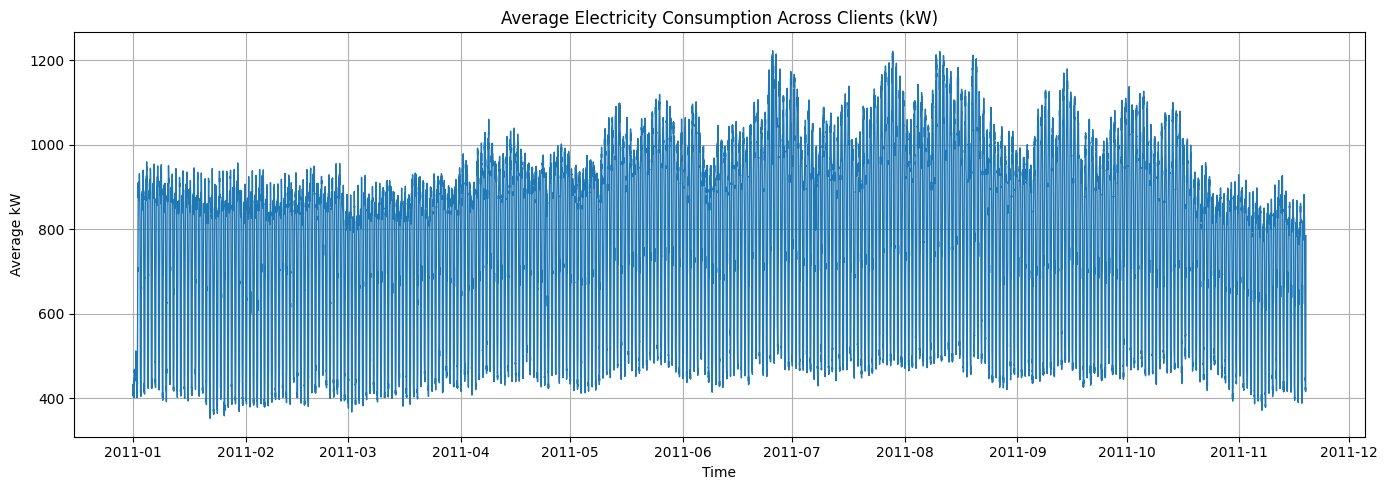

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

"""
Dataset: PEMS-SF (UCI Machine Learning Repository)
--------------------------------------------------
This dataset contains electricity consumption time series from hundreds of 
clients/meters. Values represent electricity usage in kW measured every 
15 minutes from 2011 to 2014. To convert kW → kWh for each 15-min interval, 
divide values by 4.

After preprocessing, LD2011_2014_avg_clients.csv contains:
    - timestamp : datetime index for each 15-minute period
    - MT_avg    : average electricity consumption (kW) across all non-zero clients

Useful notes:
    • Measurements are every 15 minutes → 96 samples/day
    • Dataset covers 15 months (440 days)
    • Some meters were added later; missing clients were treated as zeros
    • No missing timestamps; DST (23h/25h) handled by zeros or aggregated values
"""

# --------------------------------------------------
# Load the averaged time series (already preprocessed)
df = pd.read_csv("data/energy/LD2011_2014_avg_clients.csv", parse_dates=["timestamp"])
df = df.sort_values("timestamp")

print(df.head())

plt.figure(figsize=(14, 5))
plt.plot(df["timestamp"], df["MT_avg"], linewidth=1)
plt.title("Average Electricity Consumption Across Clients (kW)")
plt.xlabel("Time")
plt.ylabel("Average kW")
plt.grid(True)
plt.tight_layout()
plt.show()